In [2]:
import simulator as sim
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import torch

In [3]:
simulator = sim.Simulator()

layer = nn.TransformerEncoderLayer(d_model=140, nhead=140)
model = nn.TransformerEncoder(layer, num_layers=2).float()

optimizer = optim.AdamW(model.parameters())

In [16]:
def src_mask(sz):
  mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
  mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
  
  return mask

In [7]:
def loss_function(x, portfolio):
    softmax = nn.Softmax(dim=1)

    mul = torch.matmul(torch.tensor(x[:, 1:].T, dtype=torch.double), softmax(portfolio[:100, :]).T.to(torch.double))
    days = torch.diagonal(mul)

    return torch.neg(days.sum())

In [45]:
for i in range(0, 10):
    optimizer.zero_grad()

    cash = np.zeros((140, 1))

    x = simulator.simulate(144, 100)
    x = x.T[:, 4:].T
    x = np.concatenate((x, cash), axis=1)

    y = model(torch.Tensor(x.T), mask=src_mask(140))

    loss = loss_function(x, y)
    print(loss)

    loss.backward()
    optimizer.step()

tensor(-6.3306, dtype=torch.float64, grad_fn=<NegBackward0>)
tensor(-0.1128, dtype=torch.float64, grad_fn=<NegBackward0>)
tensor(-3.4524, dtype=torch.float64, grad_fn=<NegBackward0>)
tensor(-3.6640, dtype=torch.float64, grad_fn=<NegBackward0>)
tensor(-2.3690, dtype=torch.float64, grad_fn=<NegBackward0>)
tensor(-1.4258, dtype=torch.float64, grad_fn=<NegBackward0>)
tensor(-2.7694, dtype=torch.float64, grad_fn=<NegBackward0>)
tensor(-7.6511, dtype=torch.float64, grad_fn=<NegBackward0>)
tensor(-2.7839, dtype=torch.float64, grad_fn=<NegBackward0>)
tensor(-8.2137, dtype=torch.float64, grad_fn=<NegBackward0>)


In [46]:
softmax = nn.Softmax(dim=1)

x = simulator.simulate(144, 100)
x = x.T[:, 4:].T

y = model(torch.Tensor(x.T), mask=src_mask(140))

In [47]:
loss_function(x, y)

tensor(-4.3907, dtype=torch.float64, grad_fn=<NegBackward0>)

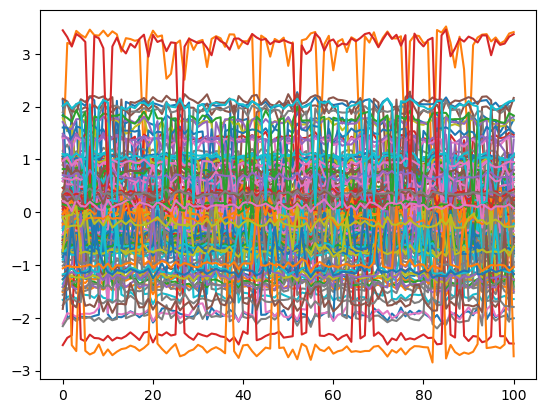

In [48]:
plt.plot(y.detach().numpy())

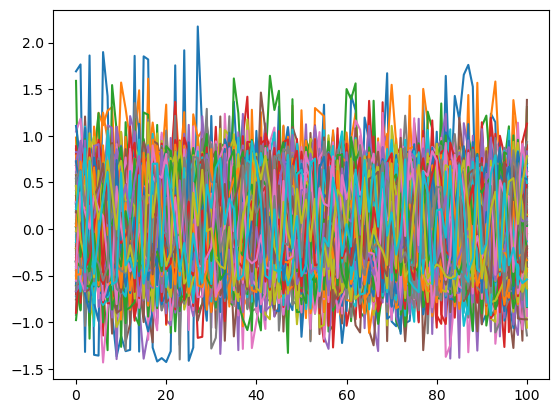

In [44]:
plt.plot(x.T)